# Import libraries

In [32]:
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
import numpy as np
import cv2
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Models arch

In [33]:
def create_gray_model(num_of_characters):
    '''

    This is the architecture of gray OCR model.    

    '''
    input_data = Input(shape=(256, 64, 1), name='input')

    inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

    inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
    inner = Dropout(0.2)(inner)

    inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
    inner = Dropout(0.2)(inner)

    target = inner.shape

    # CNN to RNN
    inner = Reshape(target_shape=((target[1], target[2]*target[3])), name='reshape')(inner)
    inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

    ## RNN
    inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
    inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

    ## OUTPUT
    inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
    y_pred = Activation('softmax', name='softmax')(inner)

    model = Model(inputs=input_data, outputs=y_pred)

    return model

# Instantiate

In [36]:
model = create_gray_model(119)
model.load_weights("../models/ranjana/gray/best_model.keras")
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 256, 64, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 256, 64, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256, 64, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 256, 64, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max1 (MaxPooling2D)             │ (None, 128, 32, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 128, 32, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128, 32, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 128, 32, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max2 (MaxPooling2D)             │ (None, 64, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 64, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max3 (MaxPooling2D)             │ (None, 64, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 64, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64, 64)         │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm1 (Bidirectional)           │ (None, 64, 512)        │       657,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm2 (Bidirectional)           │ (None, 64, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64, 119)        │        61,047 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 64, 119)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,452,535 (9.36 MB)

 Trainable params: 2,452,087 (9.35 MB)

 Non-trainable params: 448 (1.75 KB)

# Get dictionaries

In [37]:
with open("../models/ranjana/gray/ranjana_dict.txt","r") as f:
    char_dict = f.readline()
char_dict += " "

In [38]:
len(char_dict)

118

# Encoding

In [39]:
def label_to_num(label, char_dict):
    '''

        Convert labels to numerical value with respect to character dict.
    
    '''
    label_num = []
    for ch in label:
        label_num.append(char_dict.find(ch)) 
        #find() method returns the lowest index of the substring if it is found in given string otherwise -1
        
    return np.array(label_num)

def num_to_label(num, char_dict):
    '''

        Convert numerical value to labels with respect to character dict.
    
    '''
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=char_dict[ch]
    return ret

# Image

In [40]:
def preprocess_for_gray_channel(img):
    '''
    
        Preprocess for gray_channel.

    '''
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    target_shape = (64, 256)

    # Resize and convert to array
    resized_image = cv2.resize(img, (target_shape[1], target_shape[0]))
    rotated_image = cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)
    image_arr = np.array(rotated_image).reshape(-1,256,64,1)
    image_arr = image_arr/255

    return image_arr

In [67]:
image_arr = preprocess_for_gray_channel(cv2.imread("../test_data/ranjana/gray/71.png"))

In [68]:
preds = model.predict(image_arr, verbose=False)

# Define input_length for CTC decoding
input_length = np.ones(preds.shape[0]) * preds.shape[1]  # Same length for all sequences

# Convert numpy arrays to TensorFlow tensors
preds_tensor = tf.convert_to_tensor(preds, dtype=tf.float32)
input_length_tensor = tf.convert_to_tensor(input_length, dtype=tf.int32)

print(preds_tensor.shape)

# Perform CTC decoding
decoded, _ = tf.keras.backend.ctc_decode(preds_tensor, input_length=input_length_tensor, greedy=True)

# Extract the decoded values
decoded_np = decoded[0].numpy()  # Convert tensor to numpy array
print(decoded_np)

# Assuming num_to_label is a function that maps label indices to strings
prediction = [num_to_label(decoded_np[i], char_dict) for i in range(preds.shape[0])]
pred_str = "".join(prediction)
print(pred_str)

(1, 64, 119)
[[66 57 13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
सरग


# CTC

In [70]:
before = [66, -1, -1, 57 , -1, -1, 13, -1, -1]
before_str = "".join(num_to_label(before,char_dict))

print(before_str)

after = [66, 57, 13, -1 , -1, -1, -1, -1, -1]
after_str = "".join(num_to_label(after,char_dict))

print(after_str)

स
सरग



# Visualize

In [43]:
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'dense' in layer.name or 'lstm' in layer.name]

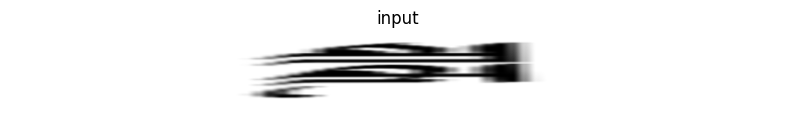

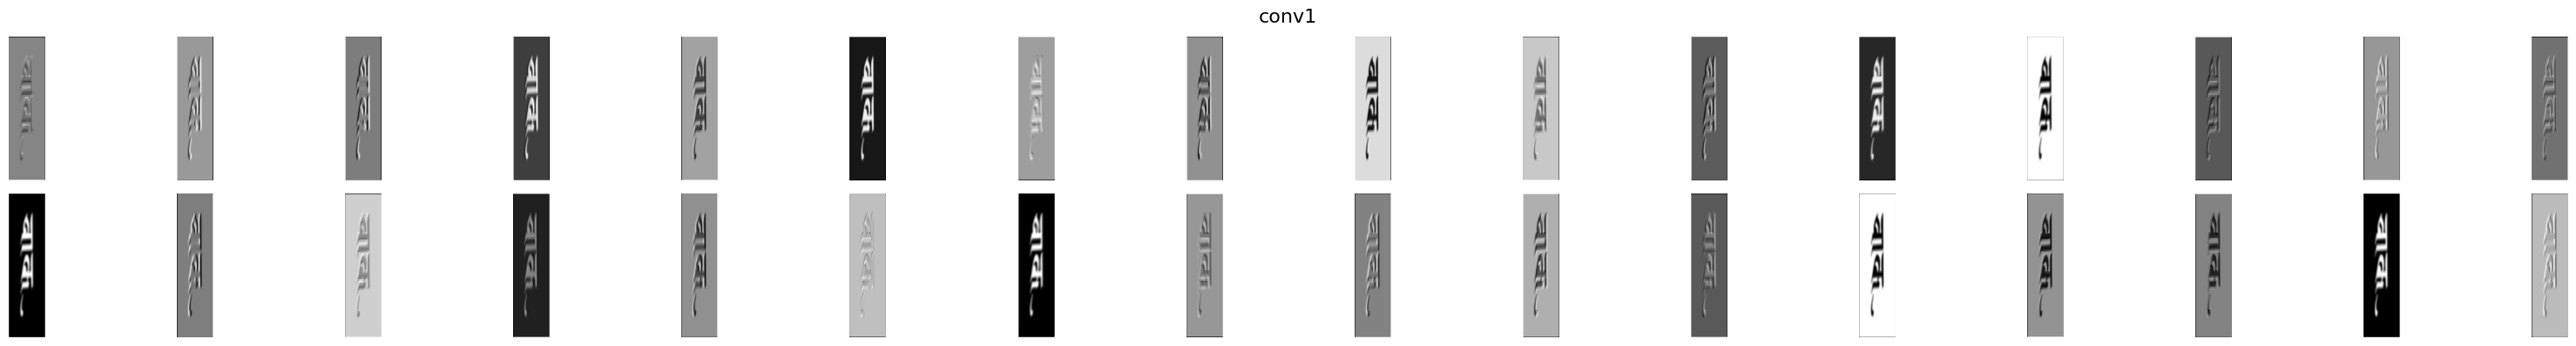

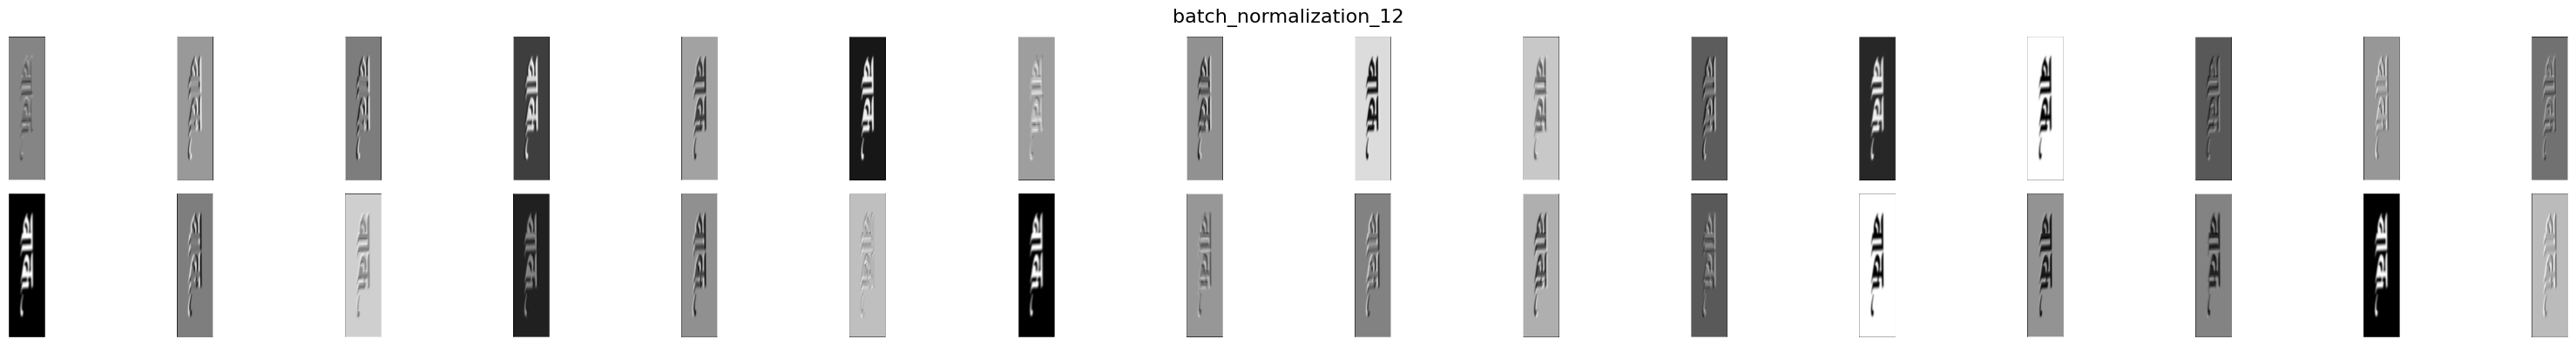

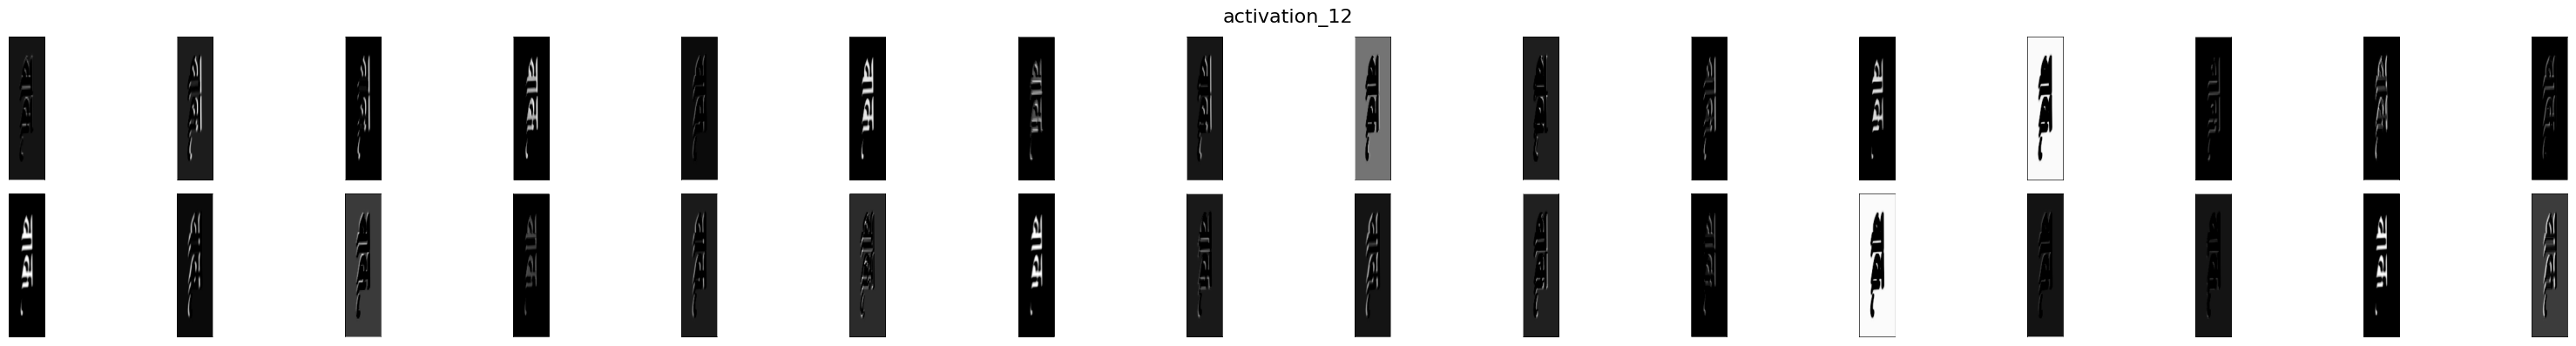

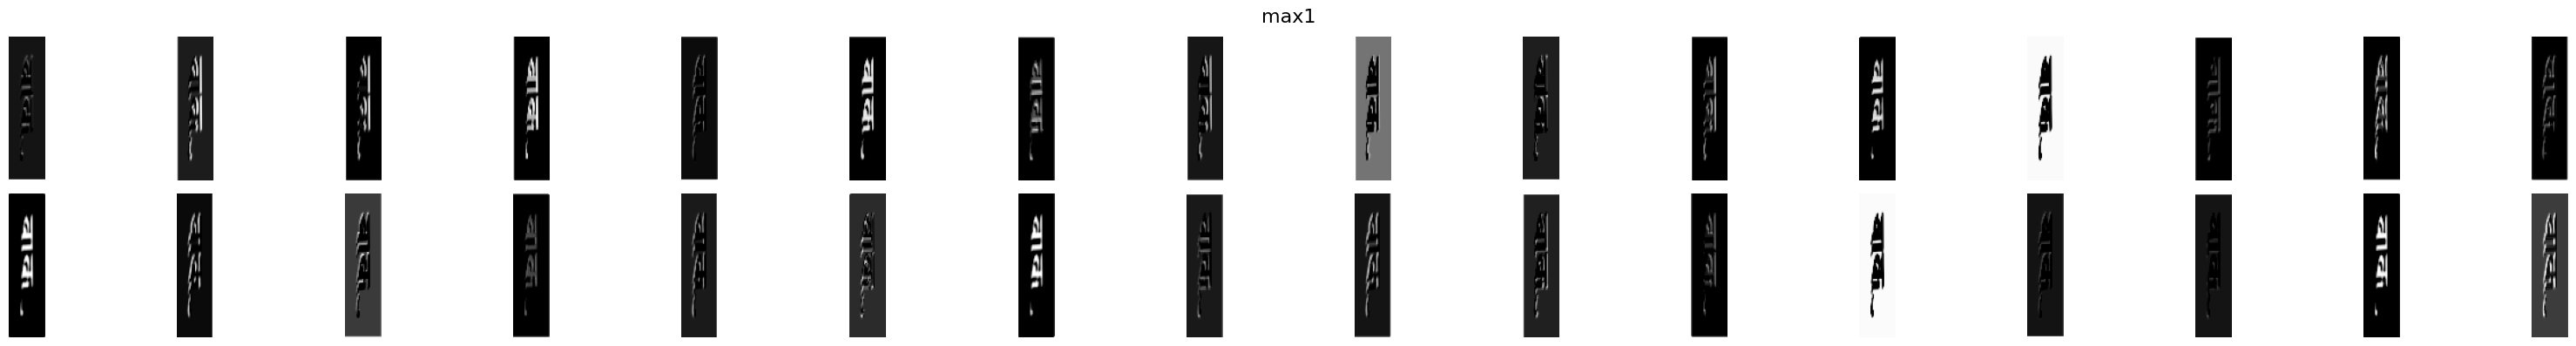

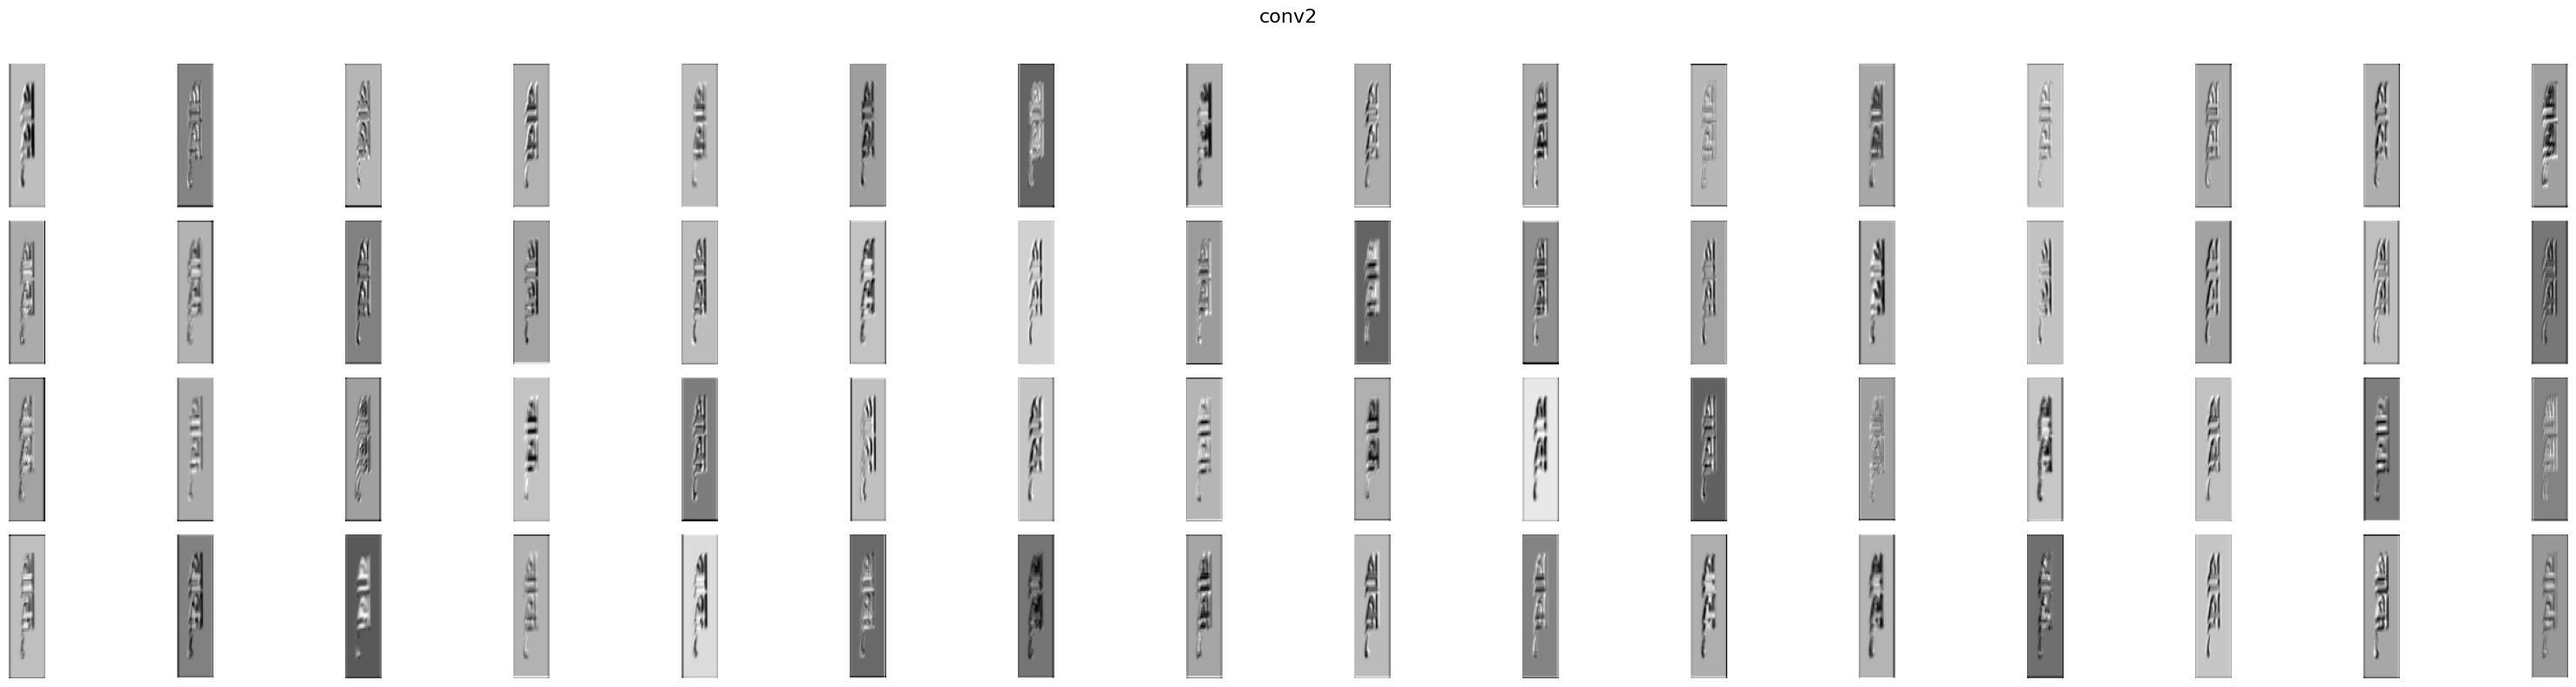

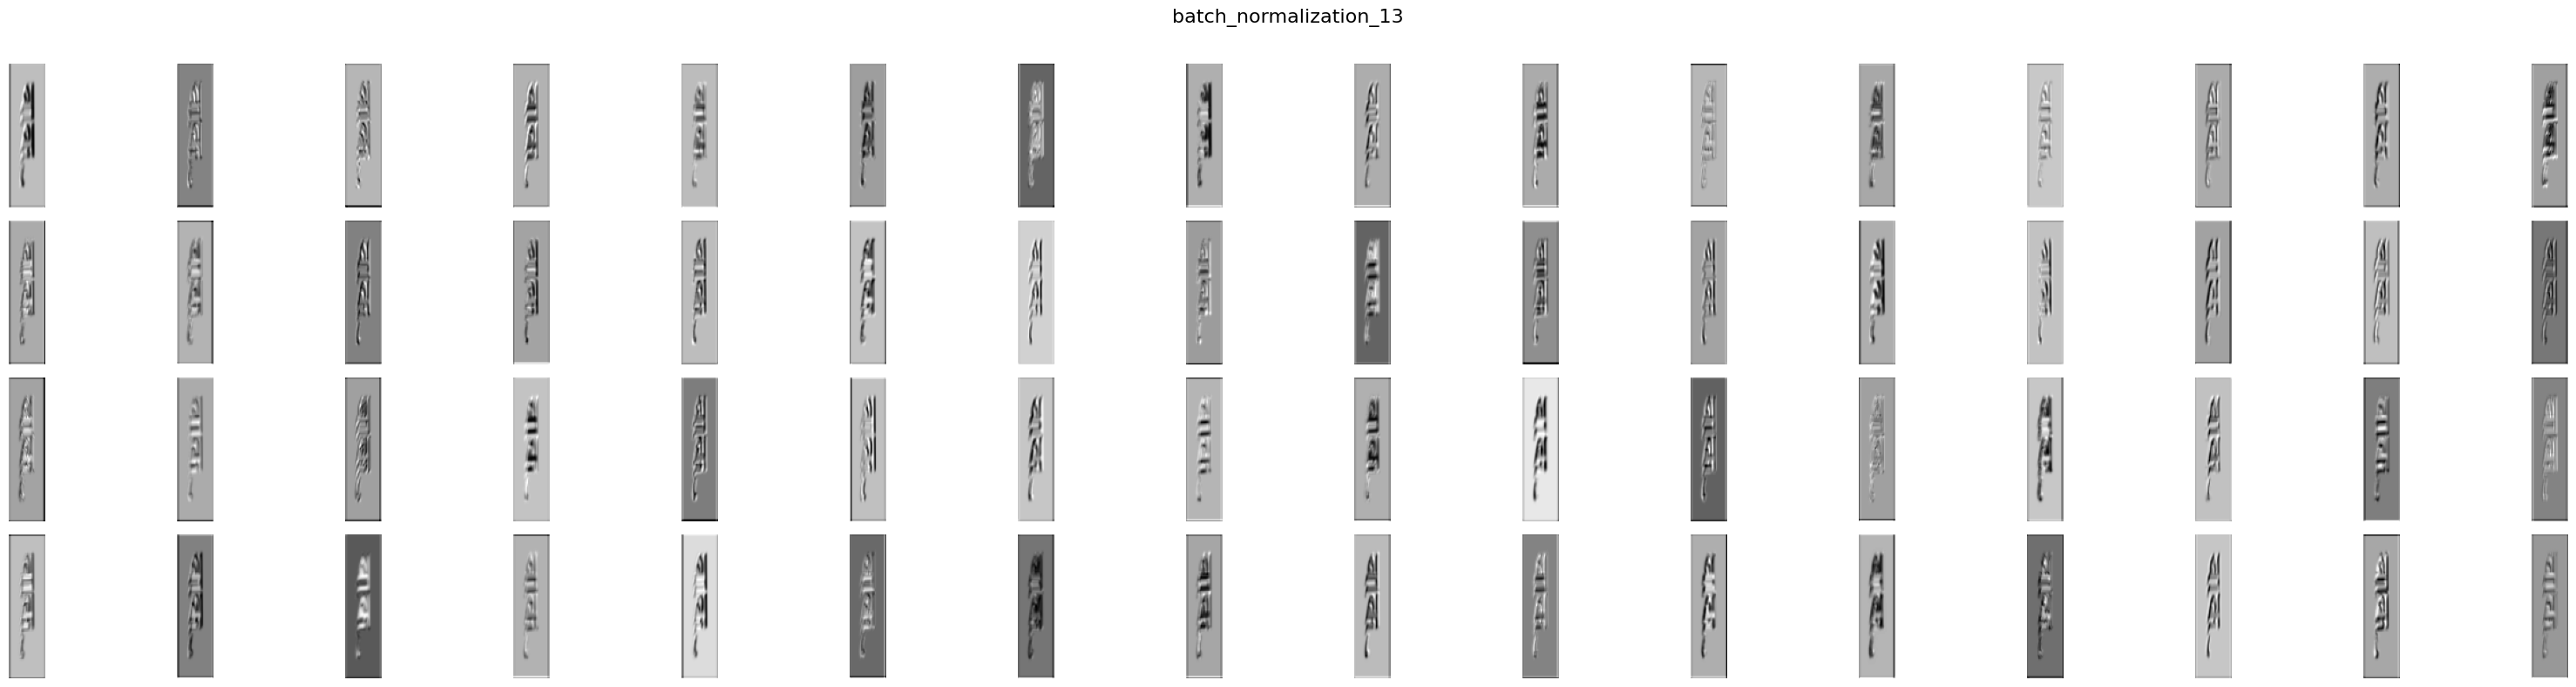

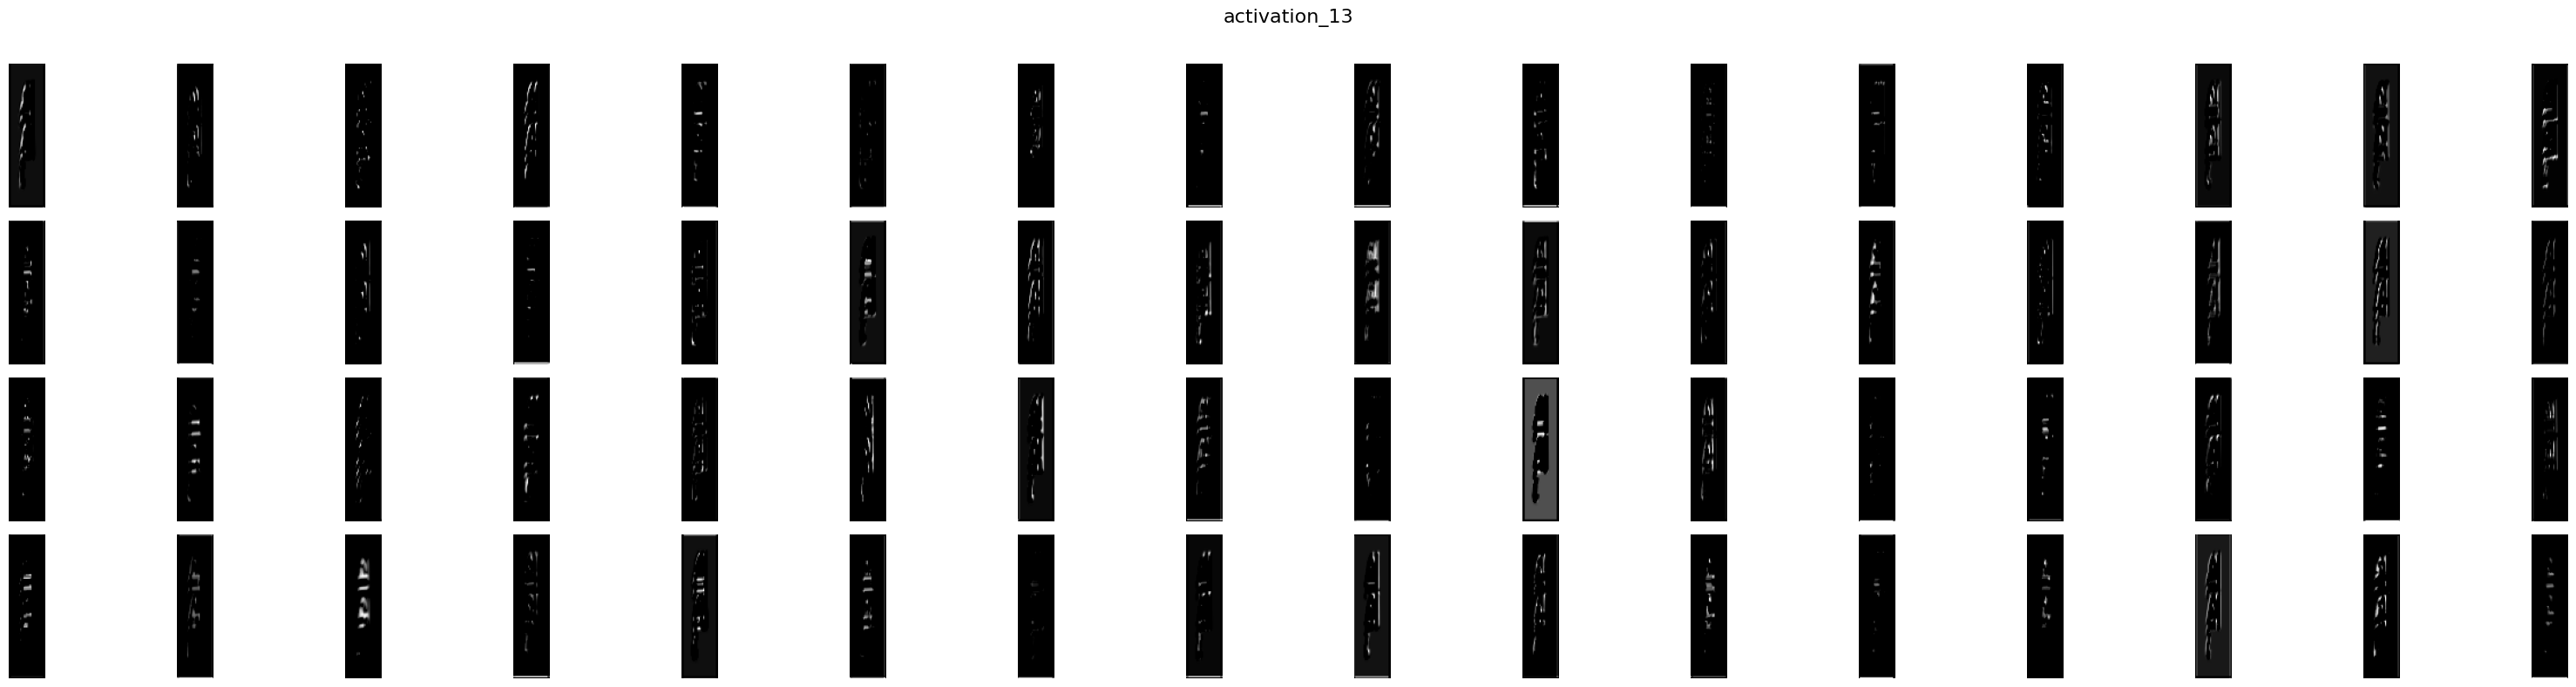

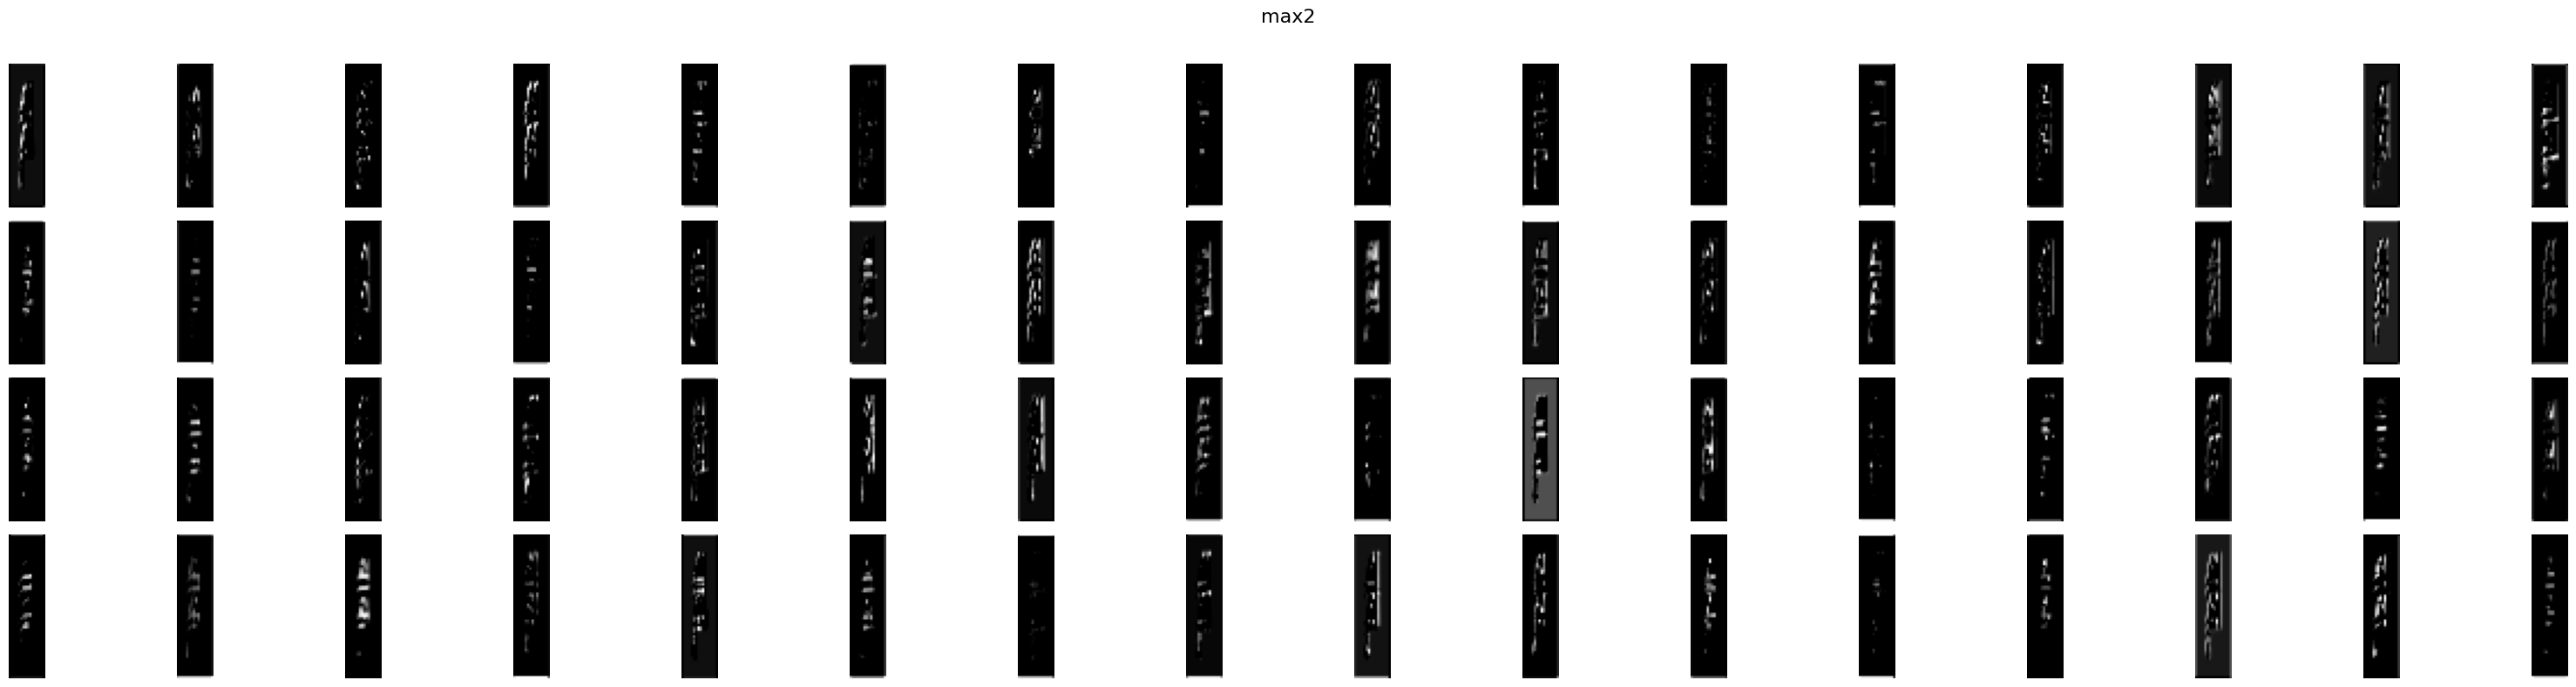

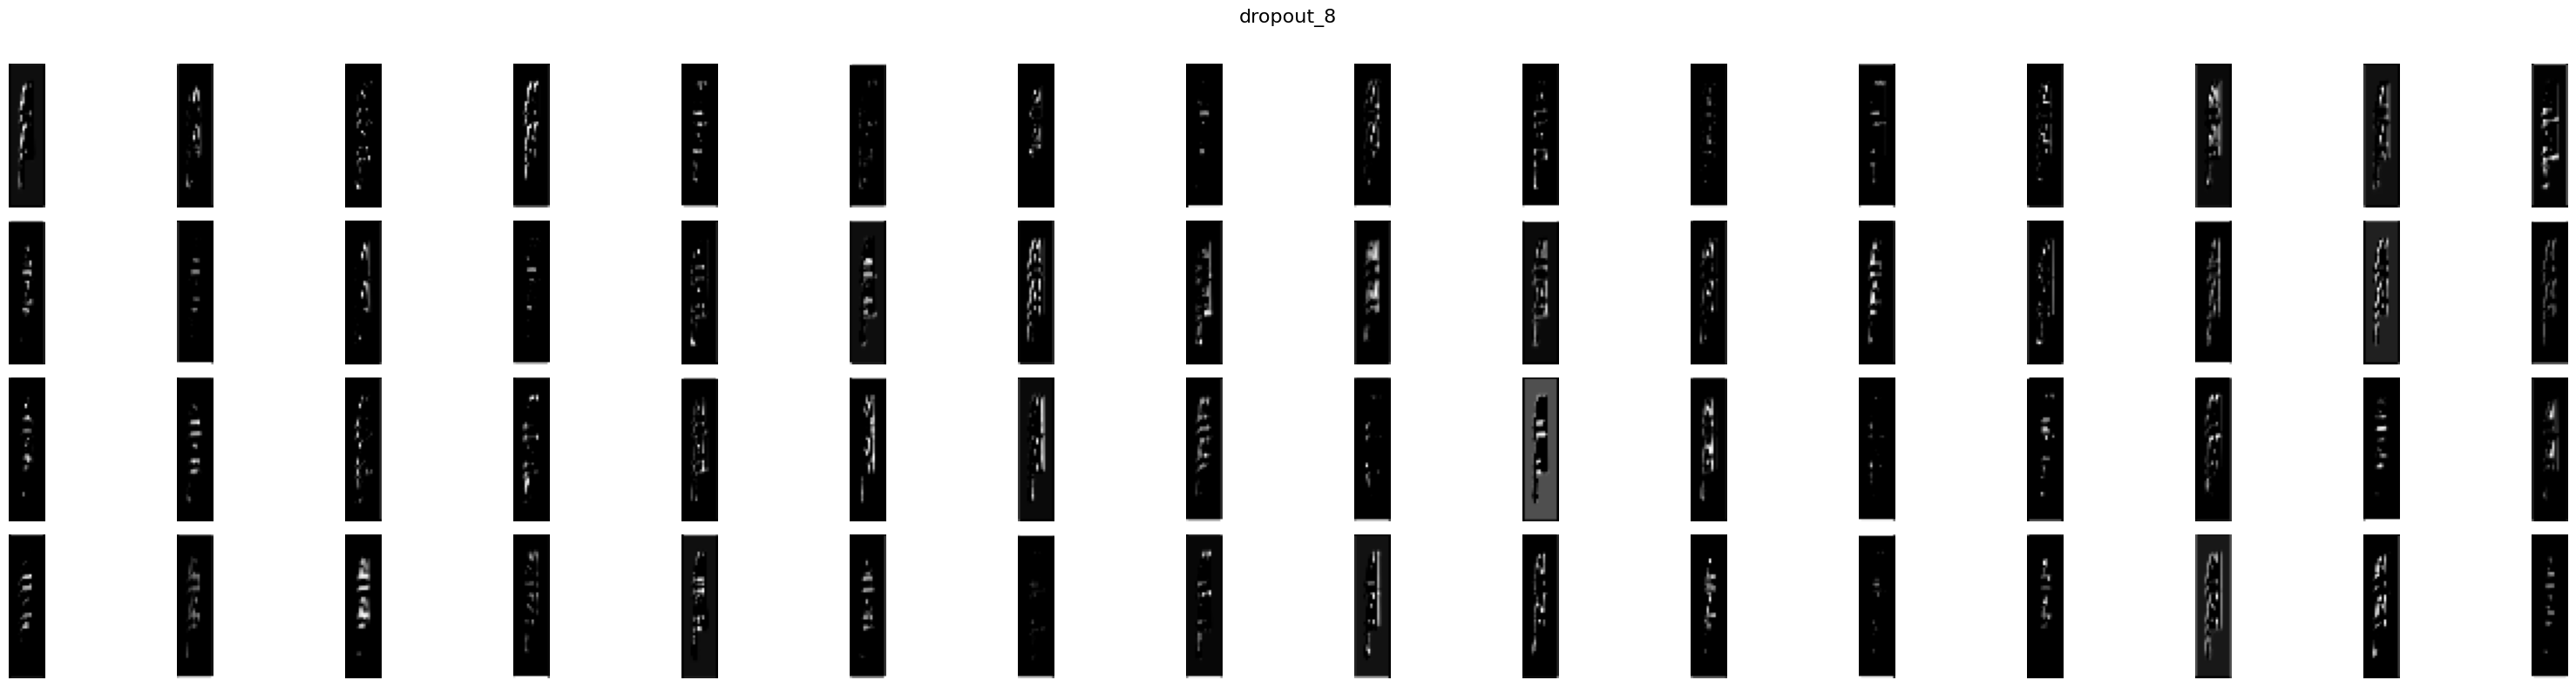

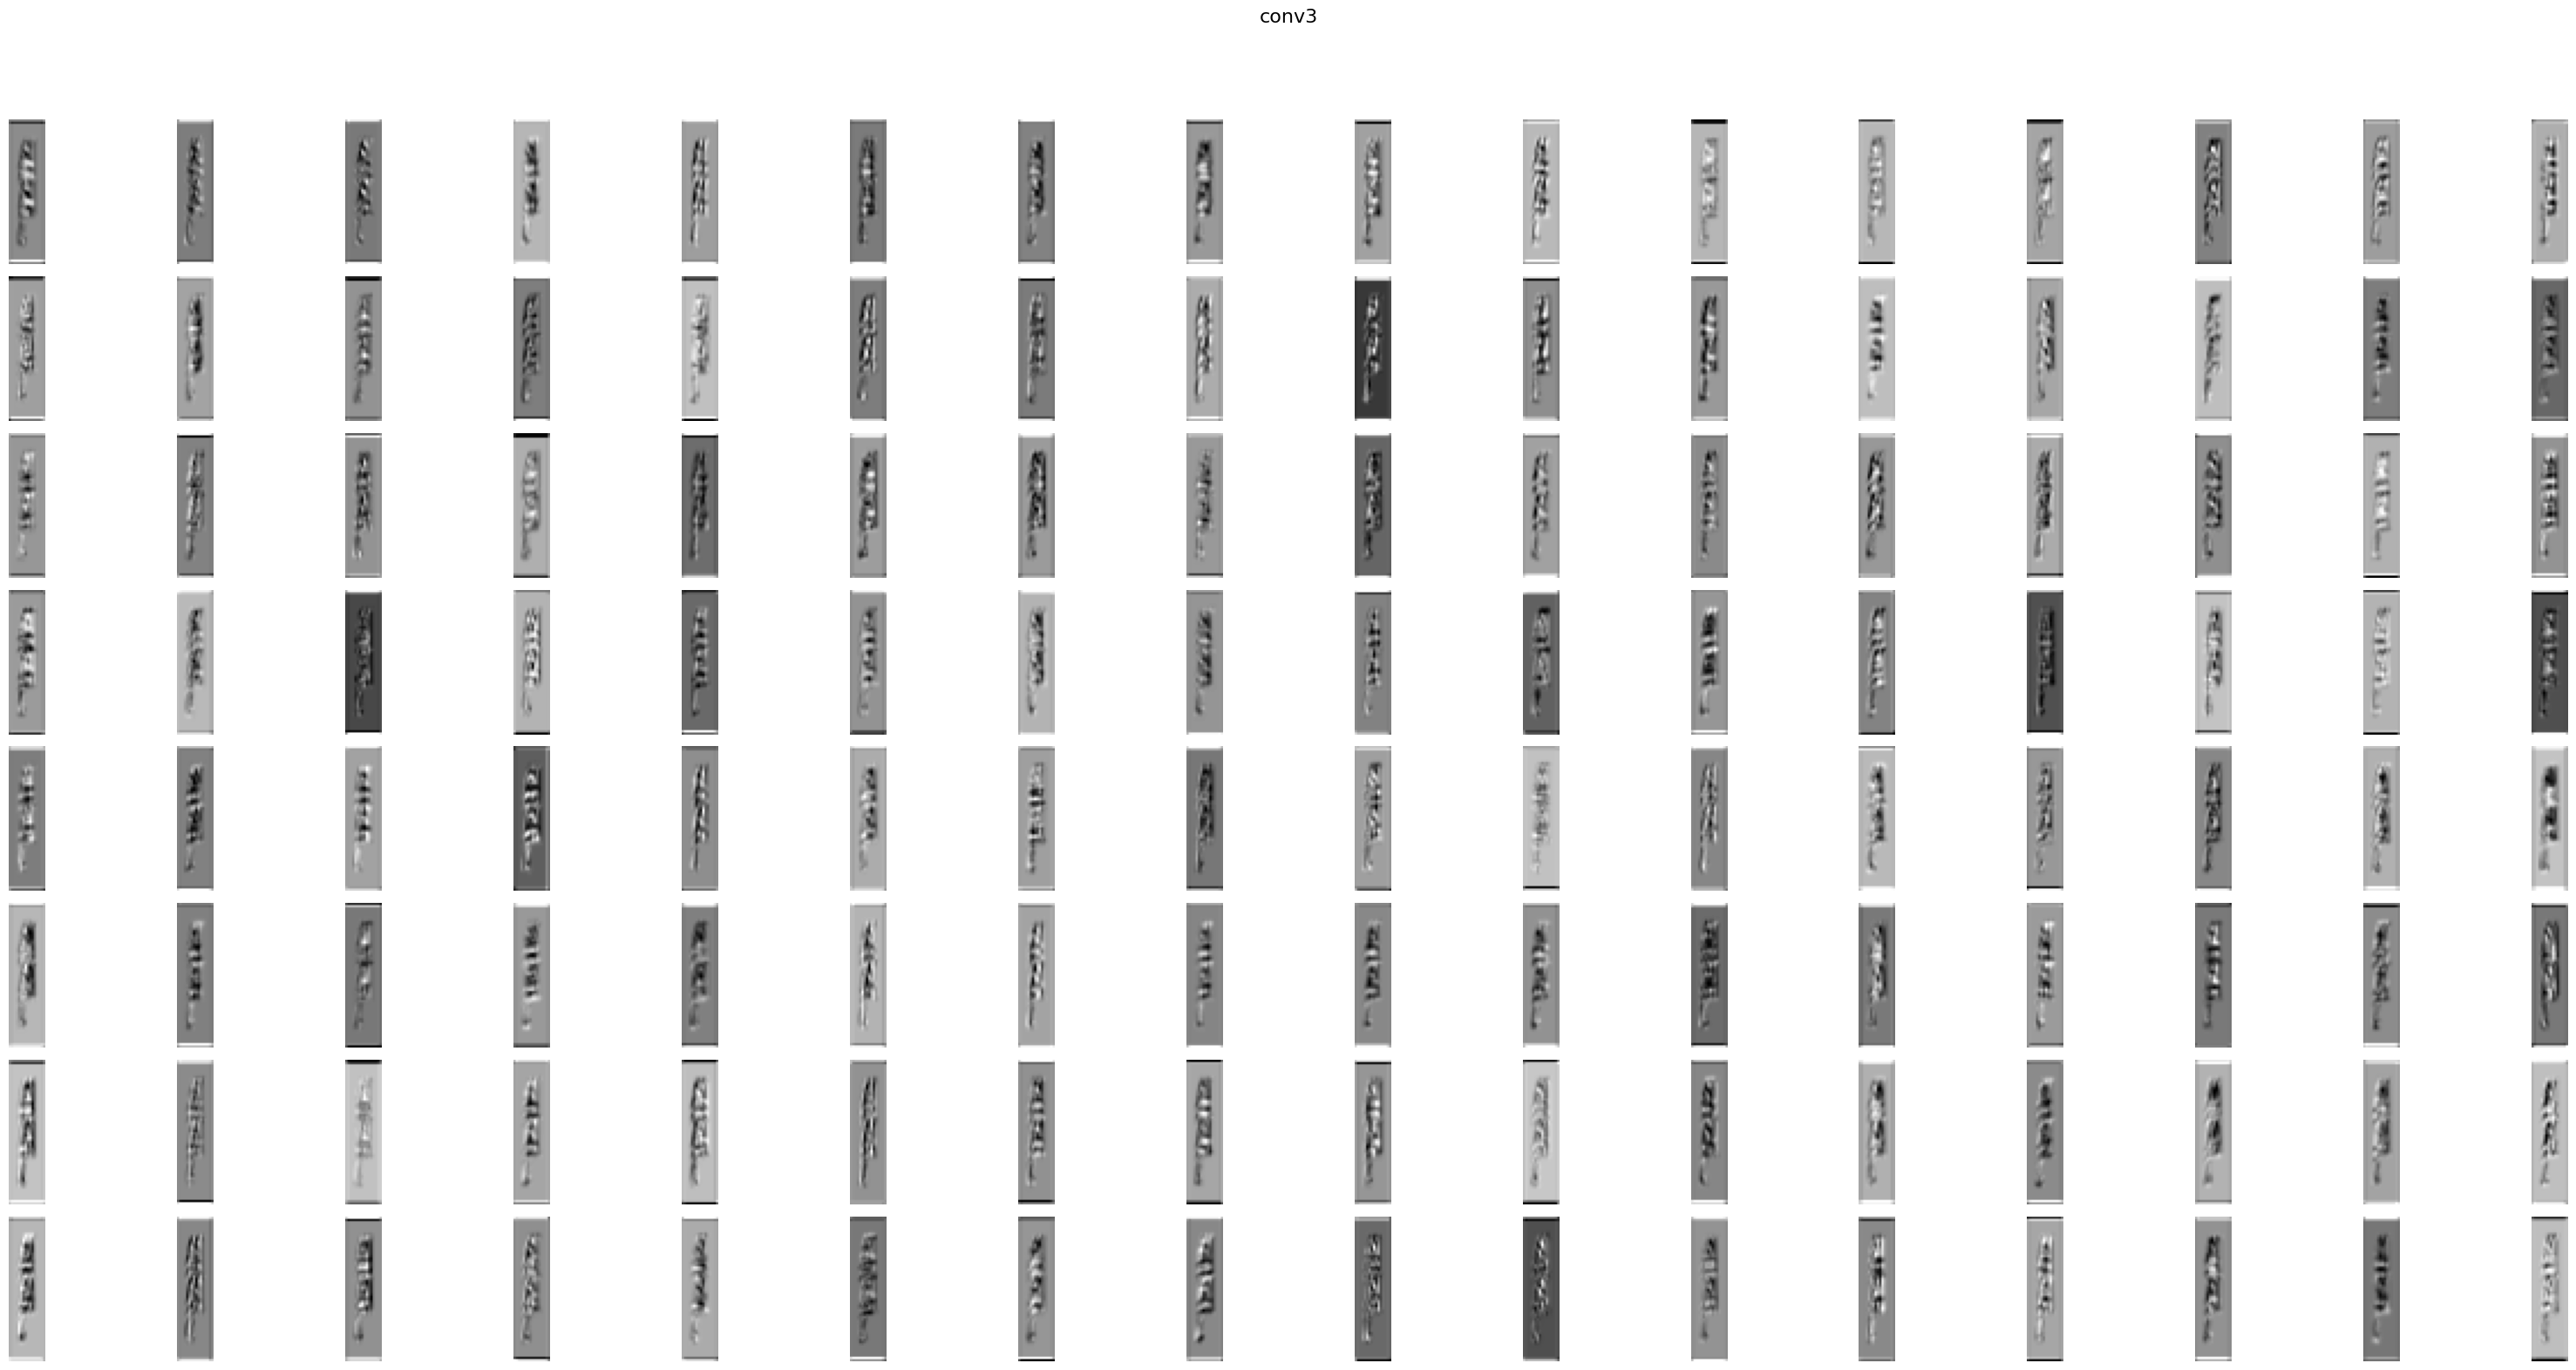

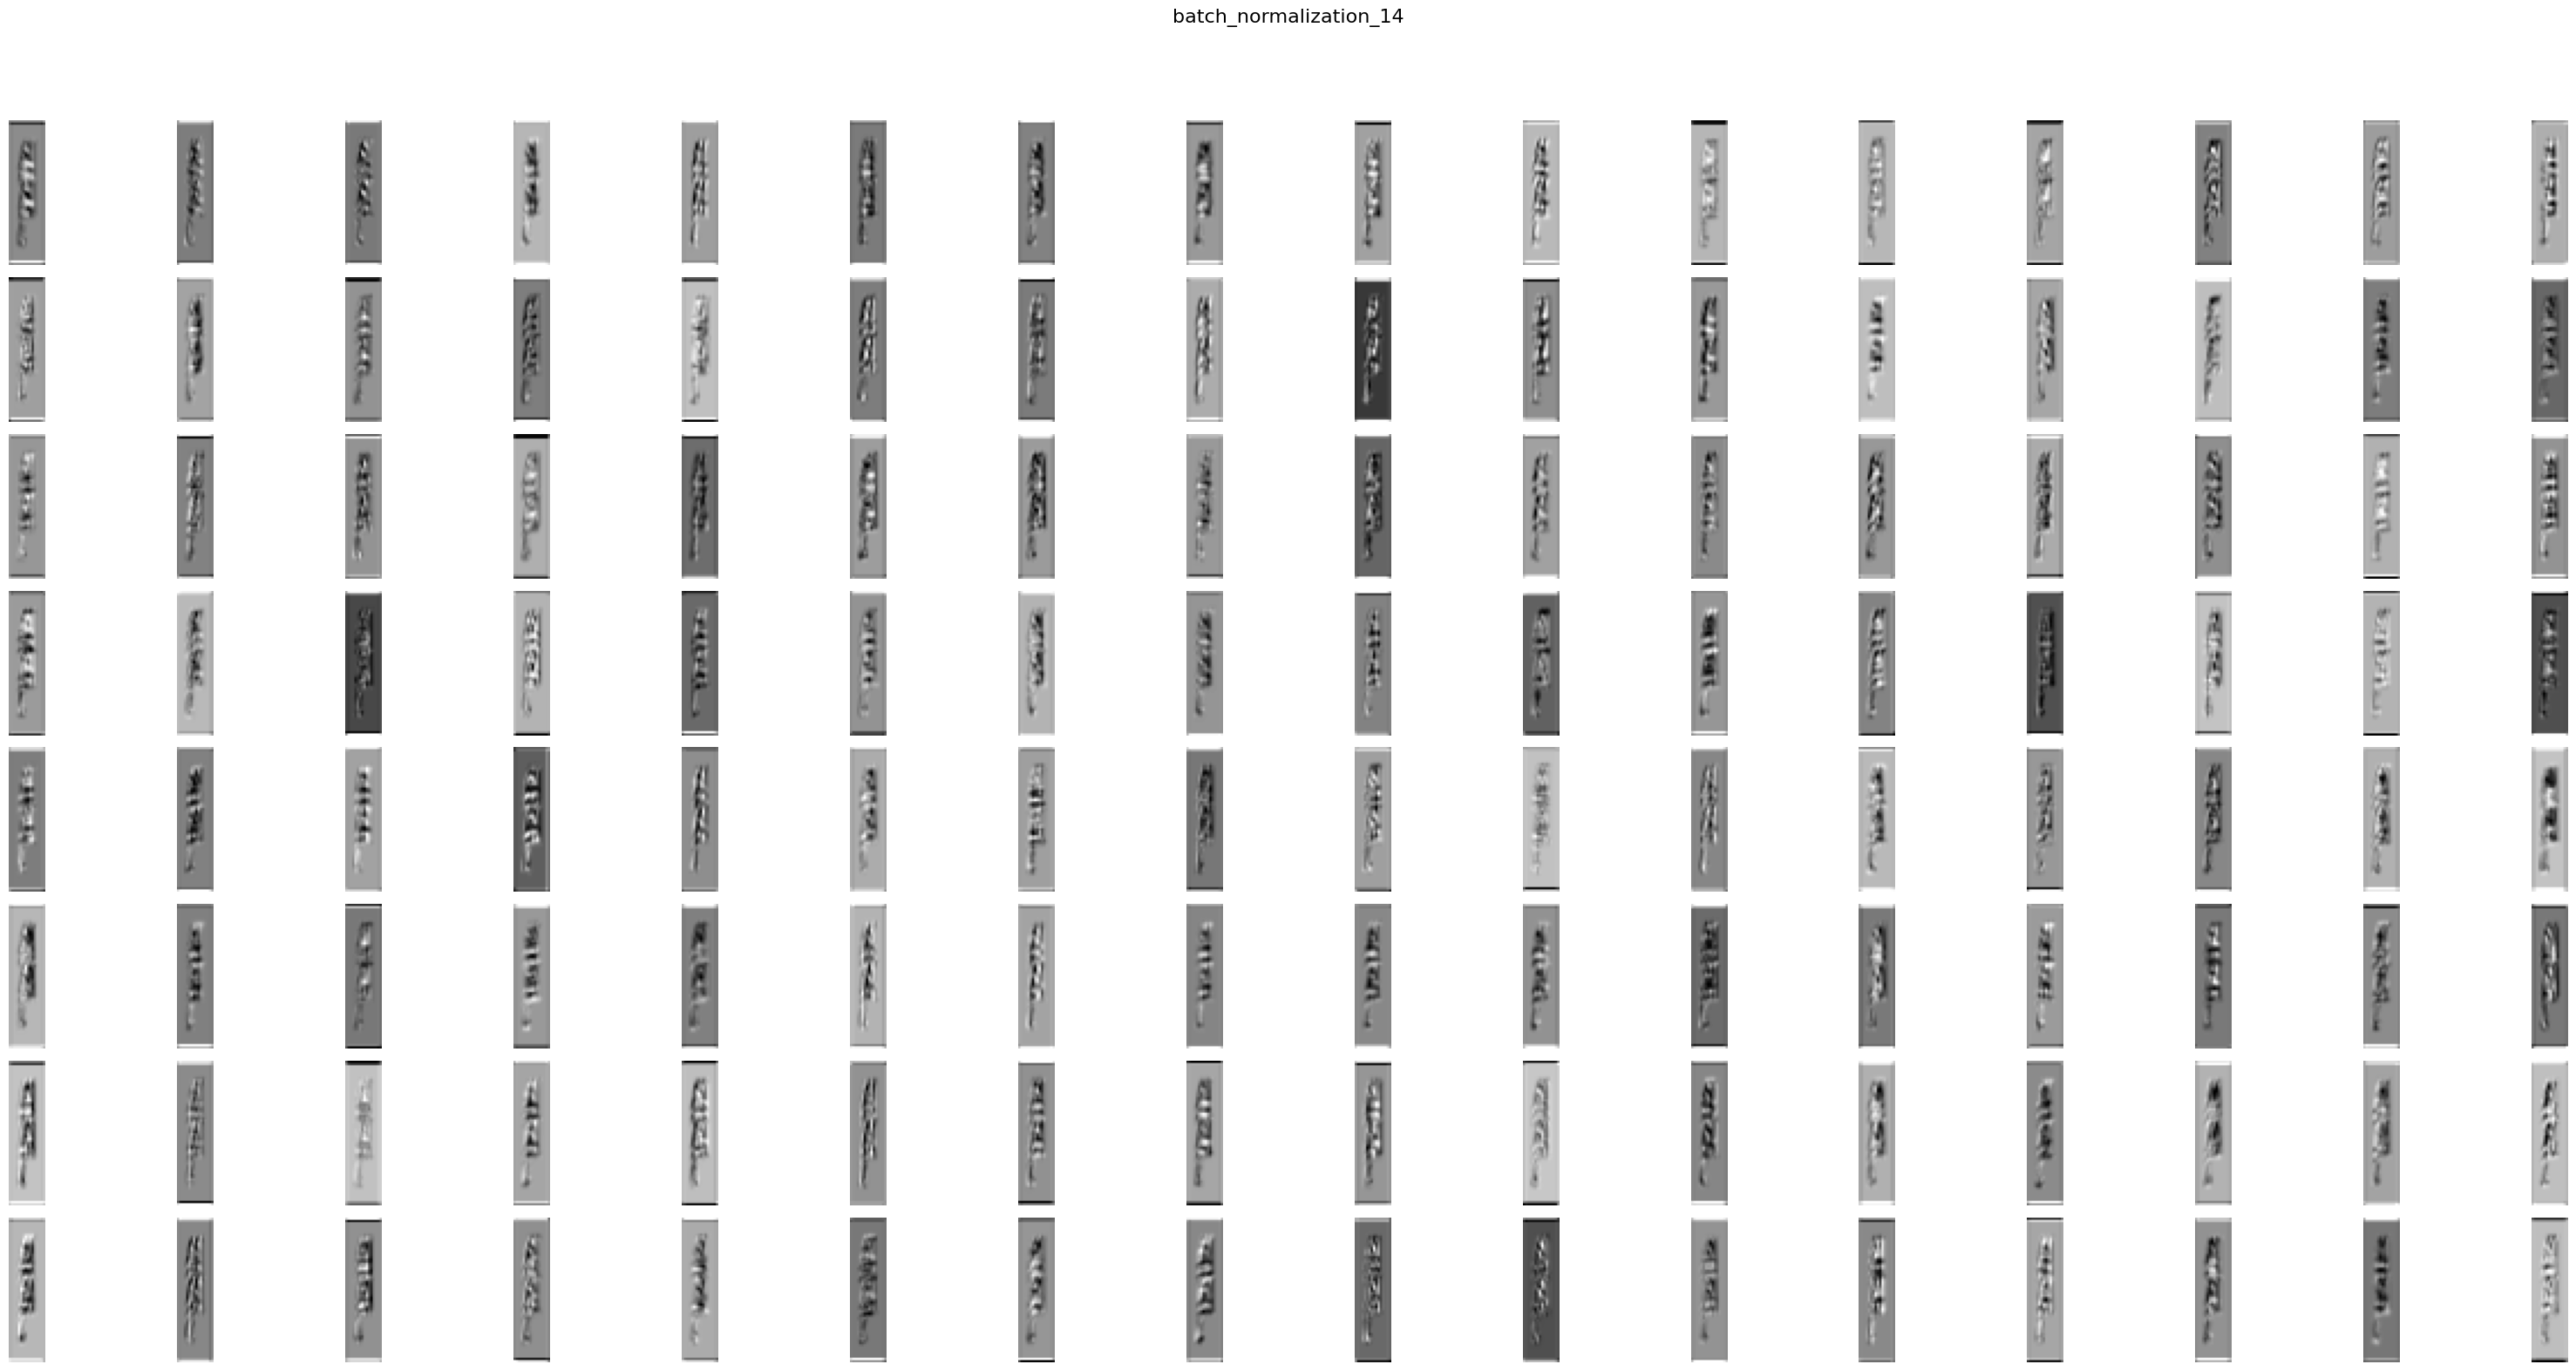

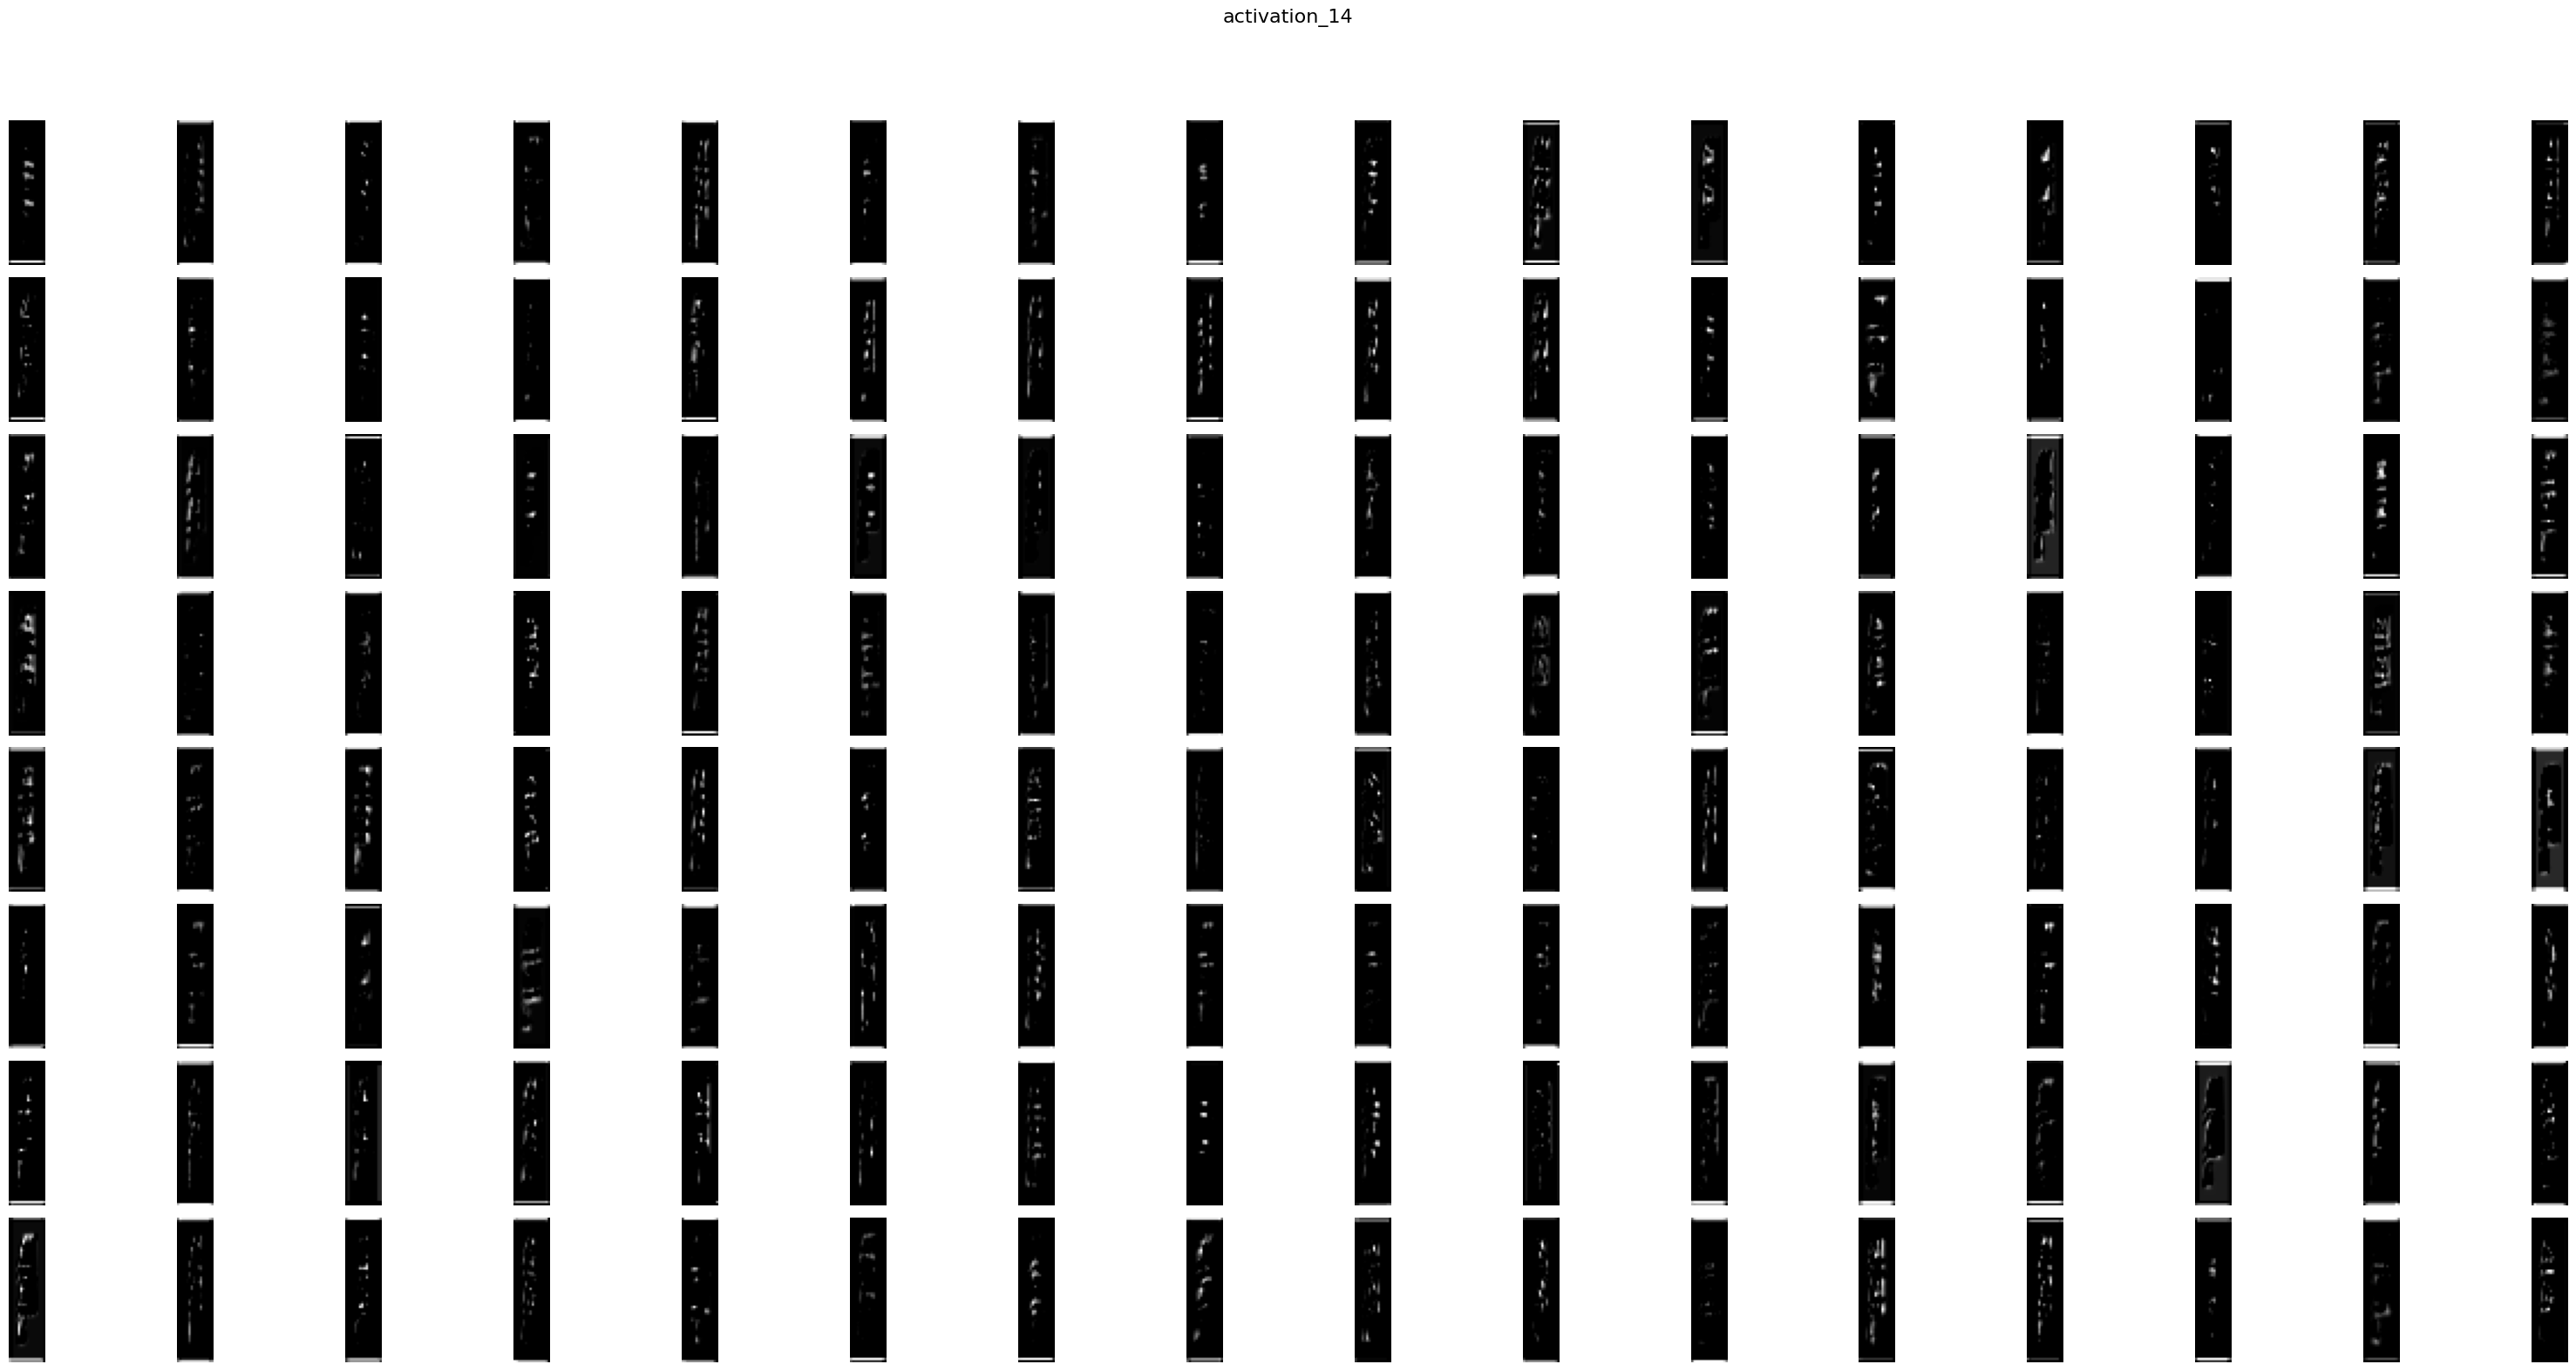

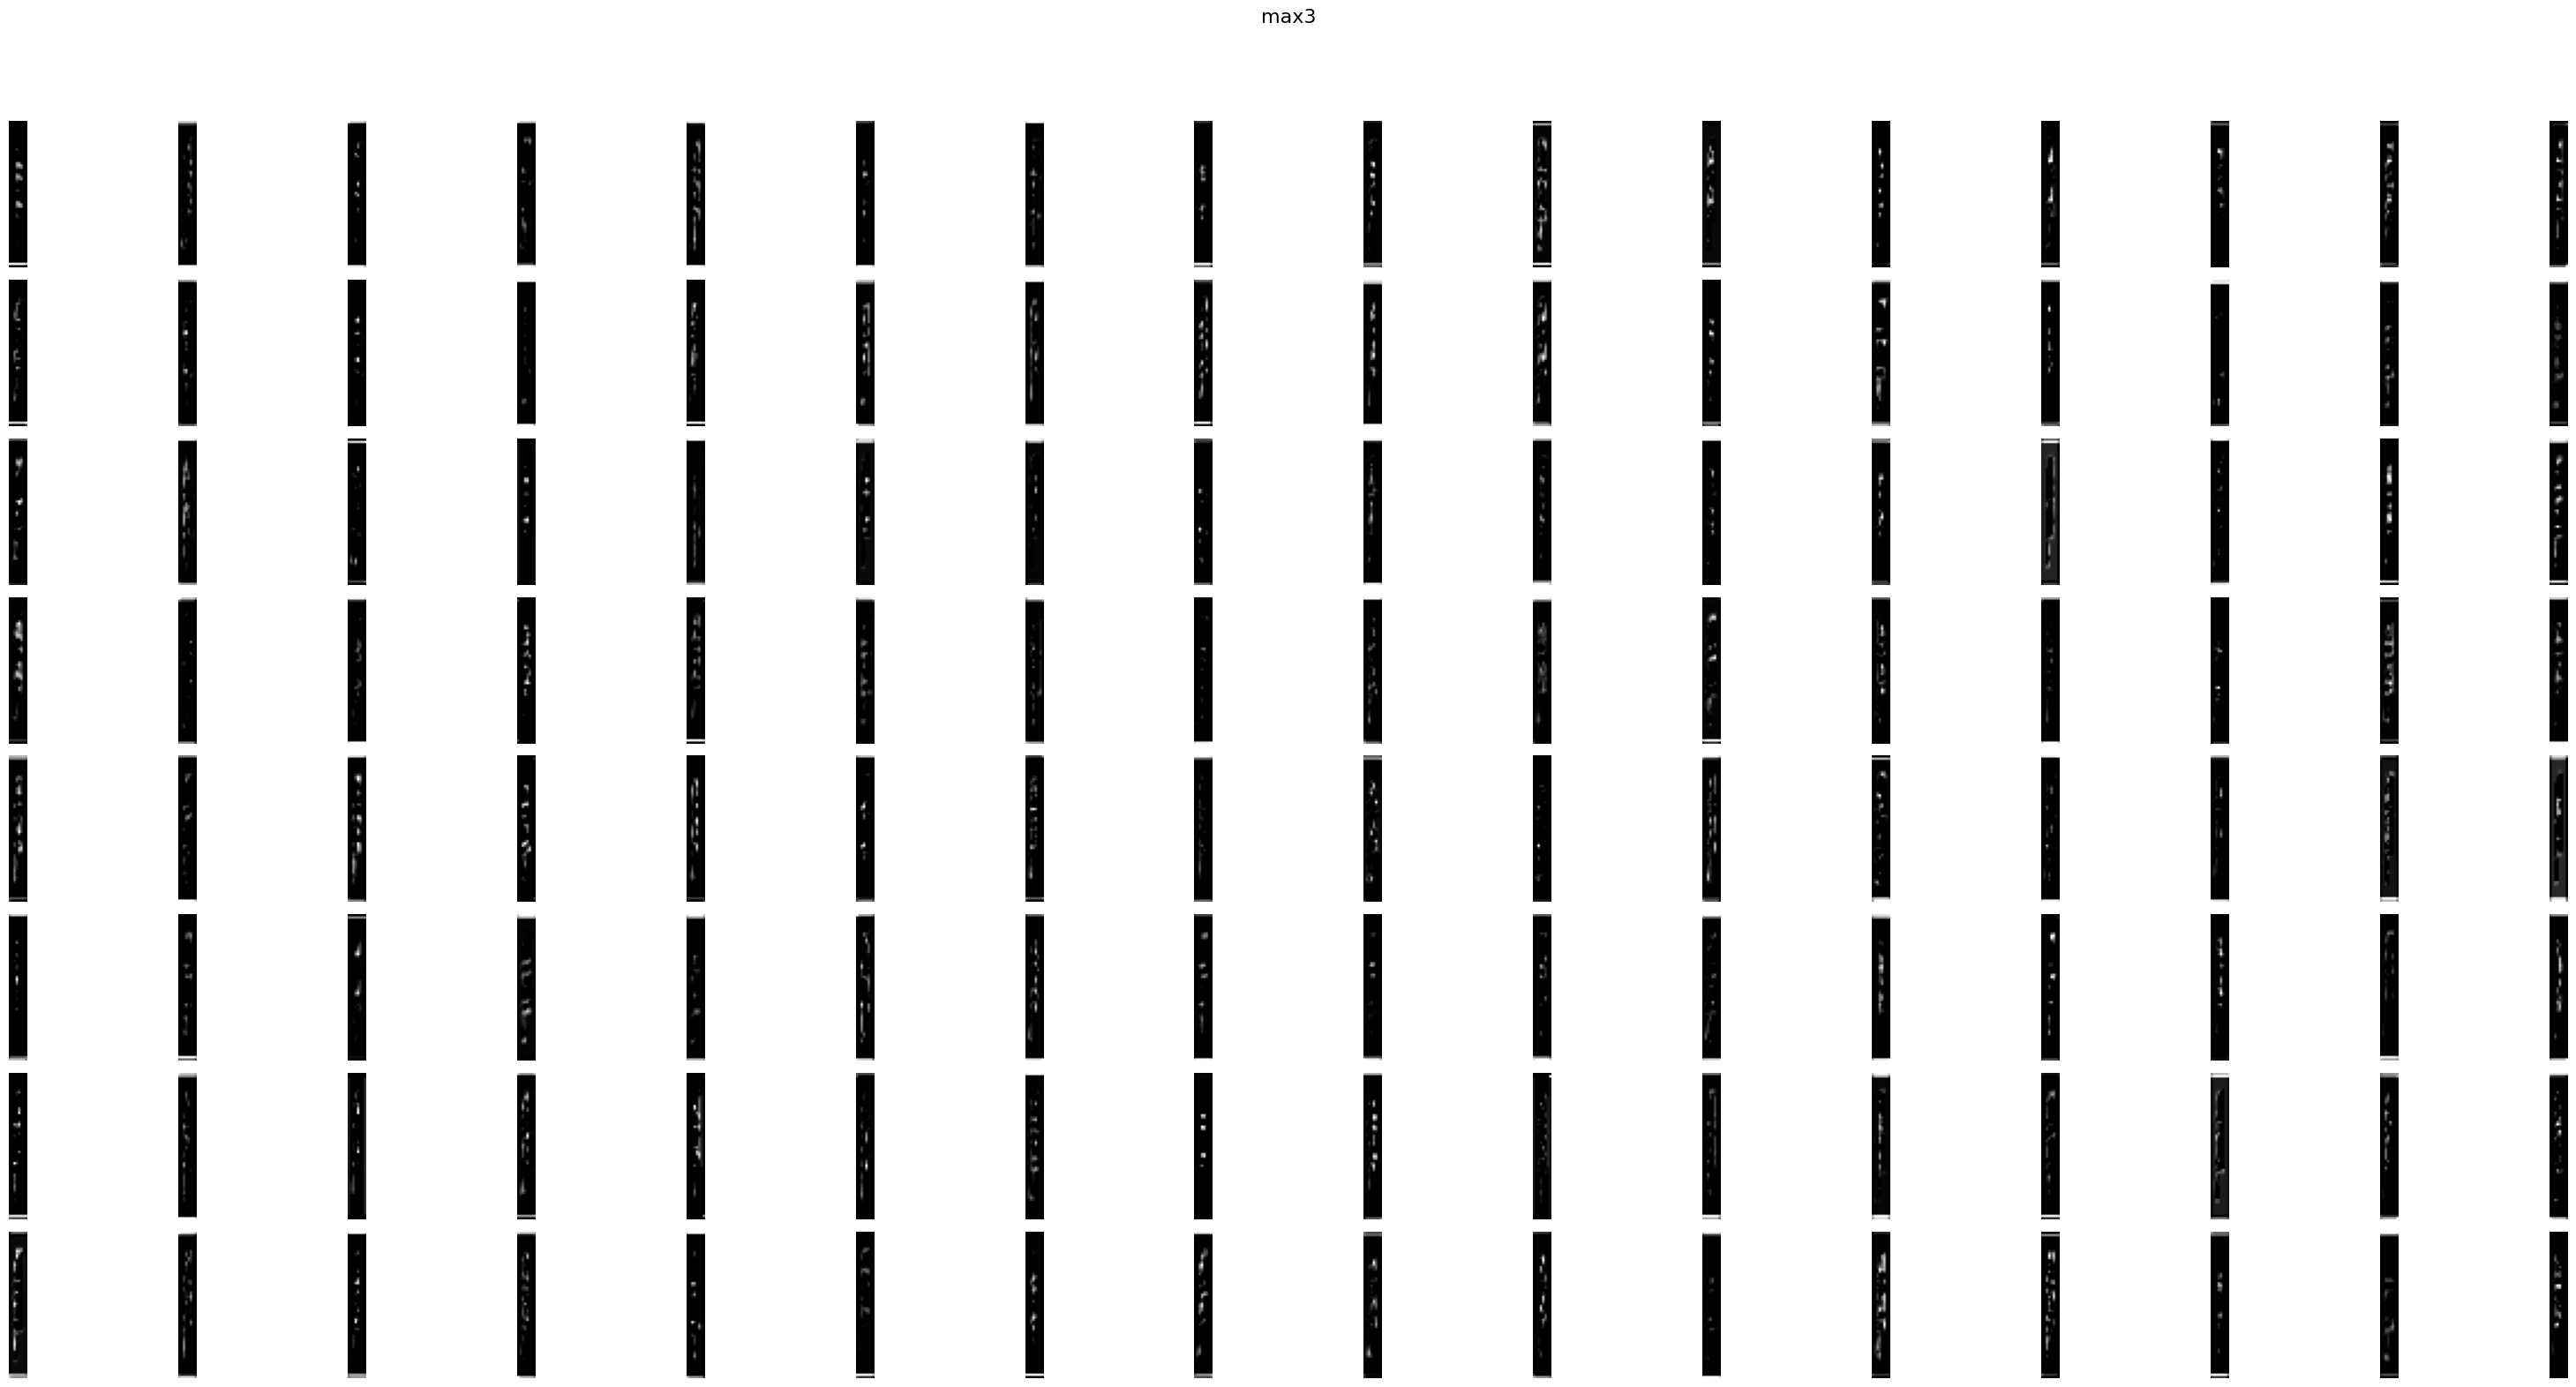

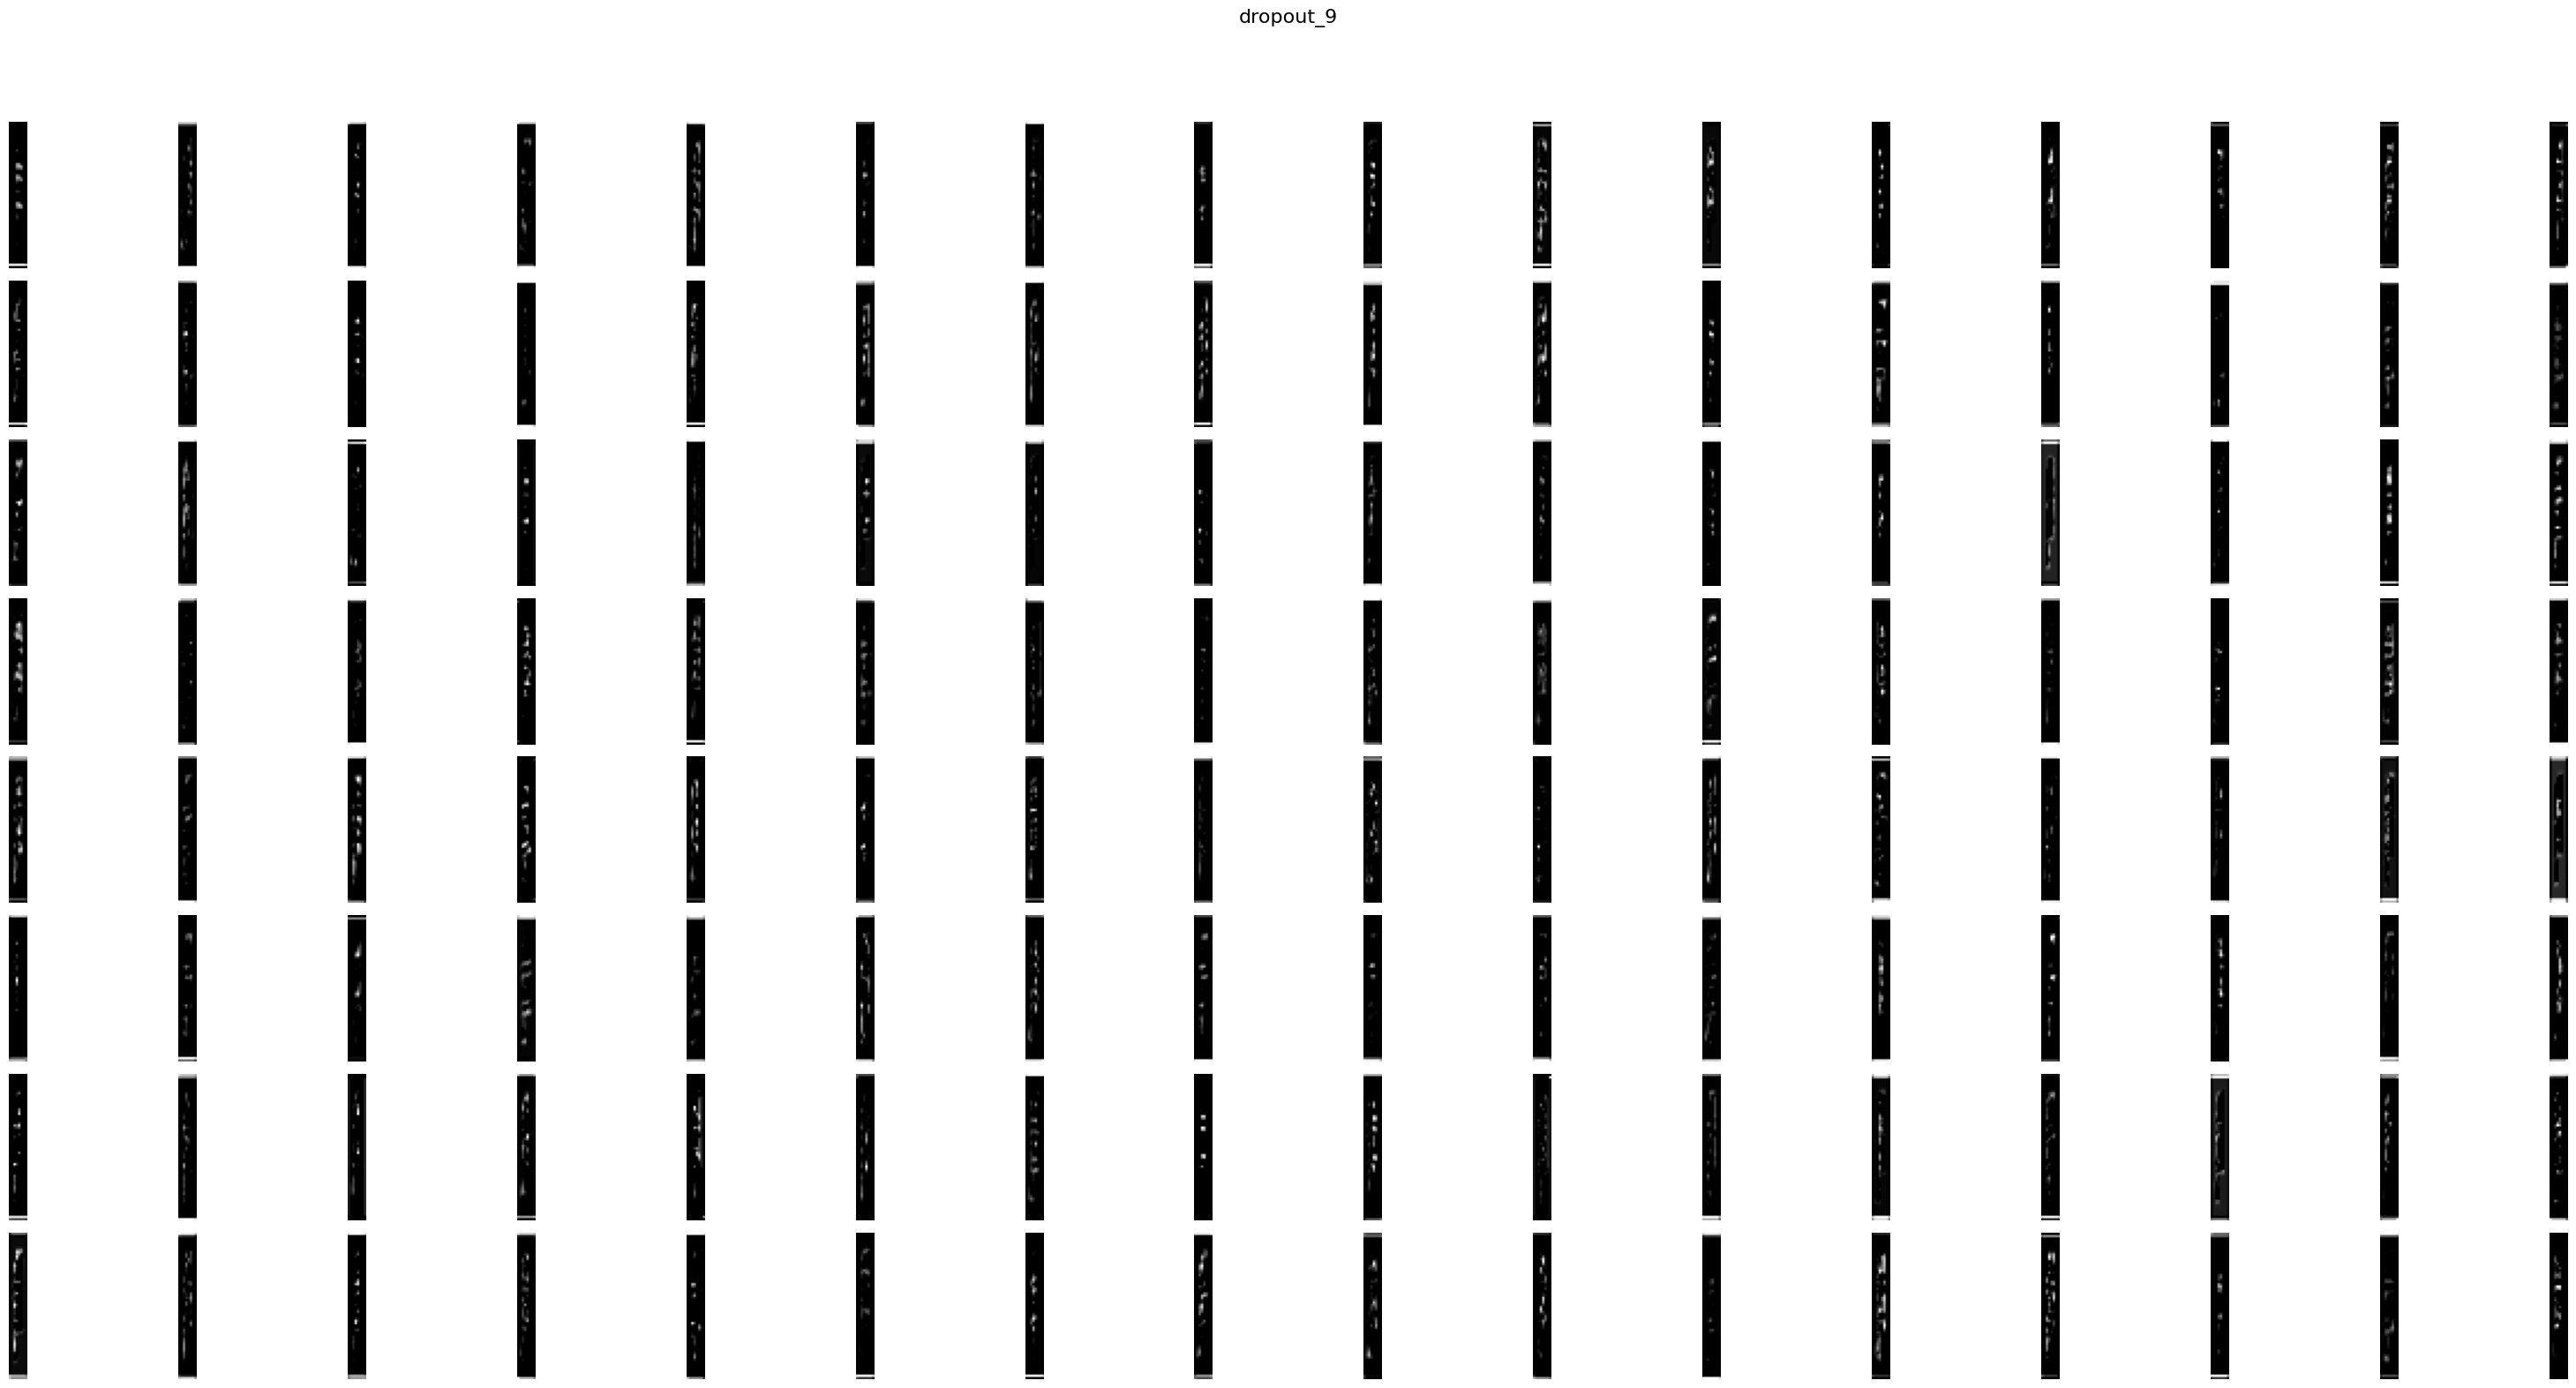

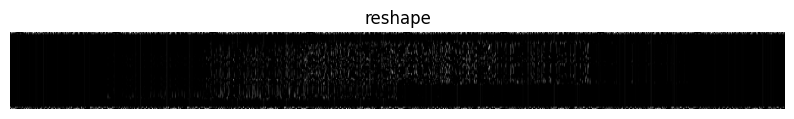

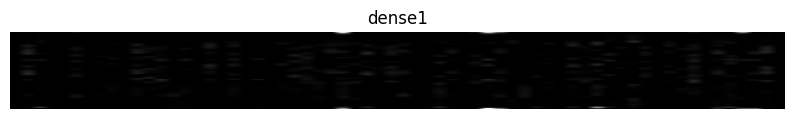

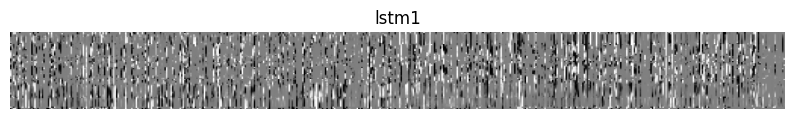

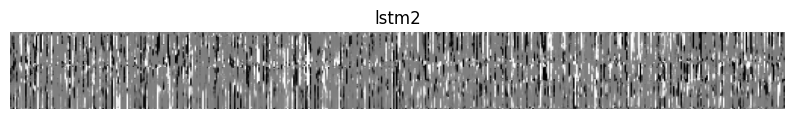

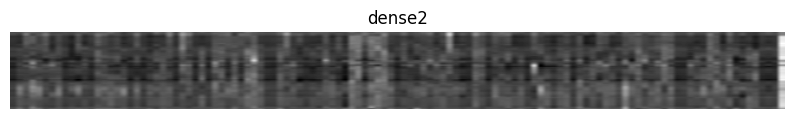

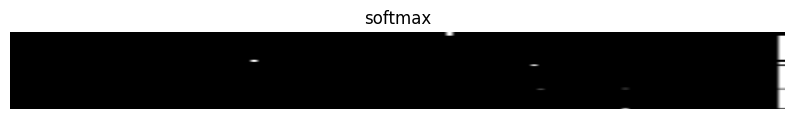

In [44]:
def plot_activations(activations, layer_name):
    activations = np.squeeze(activations)  # Remove single-dimensional entries
    if len(activations.shape) == 2:
        plot_dense_activations(activations, layer_name)
    elif len(activations.shape) == 3:
        plot_conv_activations(activations, layer_name)
    else:
        print(f"Unsupported shape {activations.shape} for layer {layer_name}")

# Function to plot activations for convolutional layers
def plot_conv_activations(activations, layer_name):
    num_filters = activations.shape[-1]
    size = activations.shape[1]
    n_cols = 16 # Number of columns to display
    n_rows = np.ceil(num_filters / n_cols).astype(int)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    fig.suptitle(layer_name, fontsize=16)
    
    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]
        if i < num_filters:
            ax.imshow(activations[:, :, i], cmap='gray')
        ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Function to plot activations for dense layers
def plot_dense_activations(activations, layer_name):
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.imshow(activations, aspect='auto', cmap='gray')
    ax.set_title(layer_name)
    ax.axis('off')
    plt.show()

# Sample input image from your data
sample_image = image_arr[0]  # Assuming image_arr contains your input images
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

# Get all layer names
layer_names = [layer.name for layer in model.layers]

# Iterate over each layer and visualize activations
for layer_name in layer_names:
    intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    activations = intermediate_model.predict(sample_image, verbose=False)
    plot_activations(activations, layer_name)
